In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import sqlite3
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification, load_digits
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix

In [2]:
tree = pd.read_csv("covtype.csv")

In [3]:
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
tree.shape

(581012, 55)

In [5]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
for col in tree.columns:
    print("column", col, "has", tree[col].nunique(), "unique values")

column Elevation has 1978 unique values
column Aspect has 361 unique values
column Slope has 67 unique values
column Horizontal_Distance_To_Hydrology has 551 unique values
column Vertical_Distance_To_Hydrology has 700 unique values
column Horizontal_Distance_To_Roadways has 5785 unique values
column Hillshade_9am has 207 unique values
column Hillshade_Noon has 185 unique values
column Hillshade_3pm has 255 unique values
column Horizontal_Distance_To_Fire_Points has 5827 unique values
column Wilderness_Area1 has 2 unique values
column Wilderness_Area2 has 2 unique values
column Wilderness_Area3 has 2 unique values
column Wilderness_Area4 has 2 unique values
column Soil_Type1 has 2 unique values
column Soil_Type2 has 2 unique values
column Soil_Type3 has 2 unique values
column Soil_Type4 has 2 unique values
column Soil_Type5 has 2 unique values
column Soil_Type6 has 2 unique values
column Soil_Type7 has 2 unique values
column Soil_Type8 has 2 unique values
column Soil_Type9 has 2 unique 

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

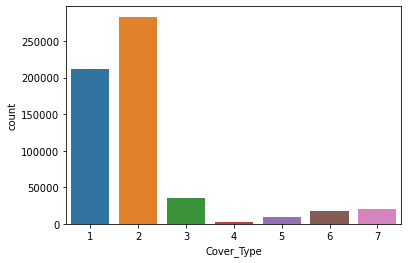

In [8]:
sns.countplot(tree["Cover_Type"])

In [9]:
tree.isnull().sum()*100/tree.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

In [10]:
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7:
        numeric.append(col)

In [11]:
numeric

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [12]:
def outlier_zscore(df, col, min_z=1, max_z=5, step=0.1, print_list=False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ["threshold", "outlier_count"])
        df_outlier["pct"] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_threshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0], 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_threshold, 0, df_outlier.outlier_count.max(),
              colors="r", ls=":")
    plt.annotate("Zscore: {}\nValue: {}\nPercentile: {}".format(best_threshold, outlier_limit,
                                                               (np.round(percentile_threshold, 3),
                                                               np.round(100-percentile_threshold, 3))),
                (best_threshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_threshold, outlier_limit, percentile)

In [13]:
def outlier_inspect(df, col, min_z=1, max_z=5, step=0.5, max_hist=None, bins=50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1, 3, 1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins=50)
    else:
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins=50)
    plt.subplot(1, 3, 2)
    sns.boxplot(df[col])
    plt.subplot(1, 3, 3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z=max_z, step=step)
    plt.show()

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


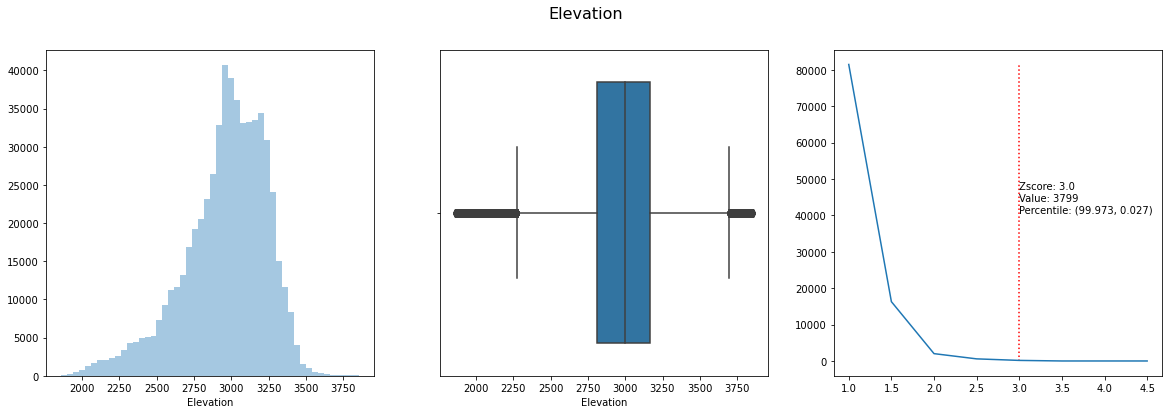

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


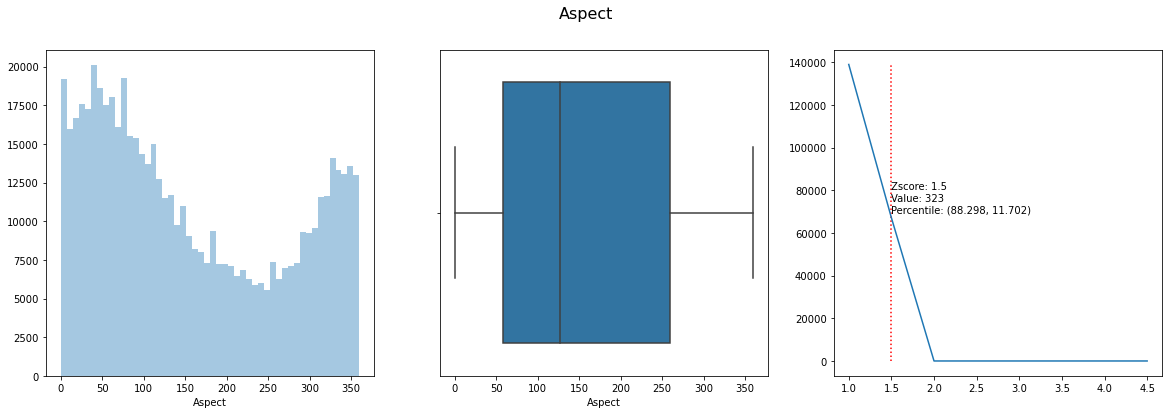

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


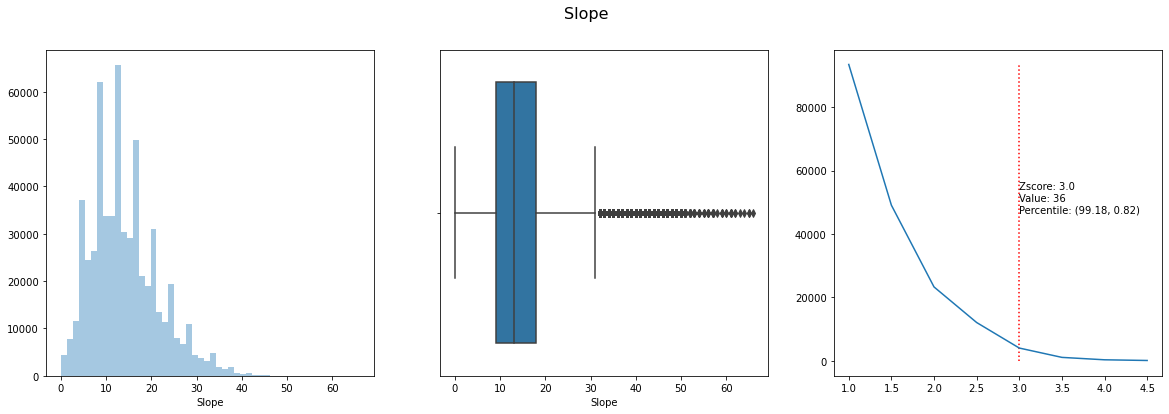

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


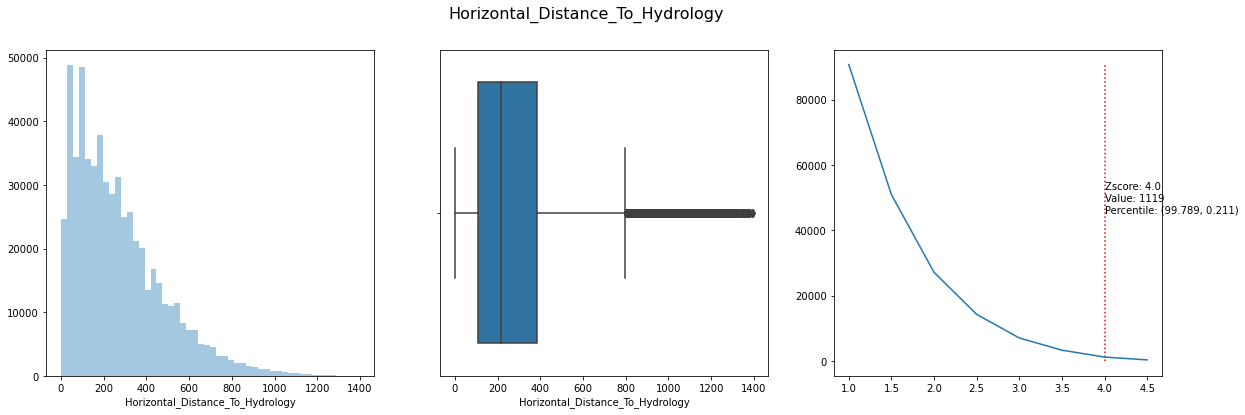

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


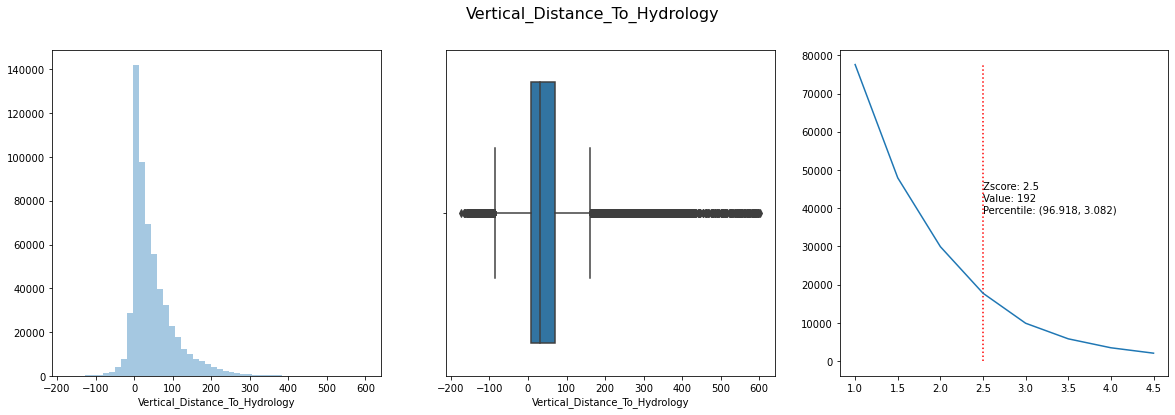

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


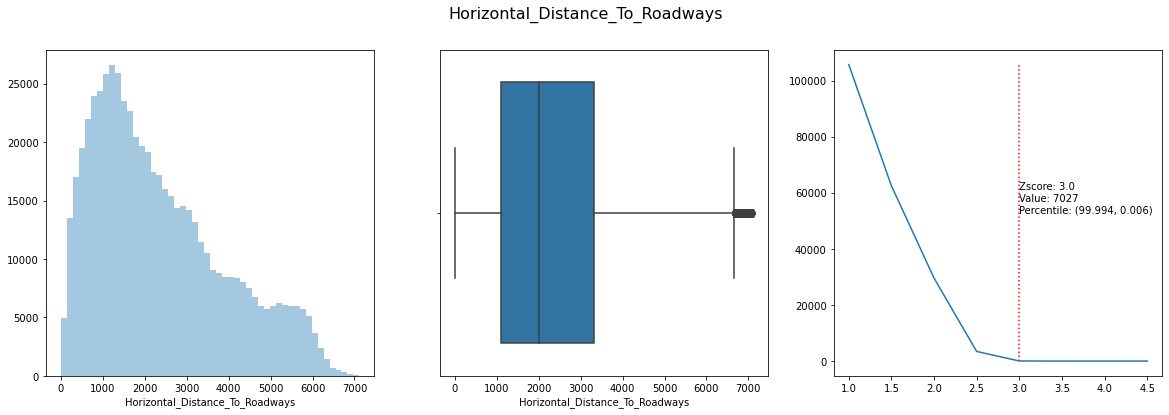

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


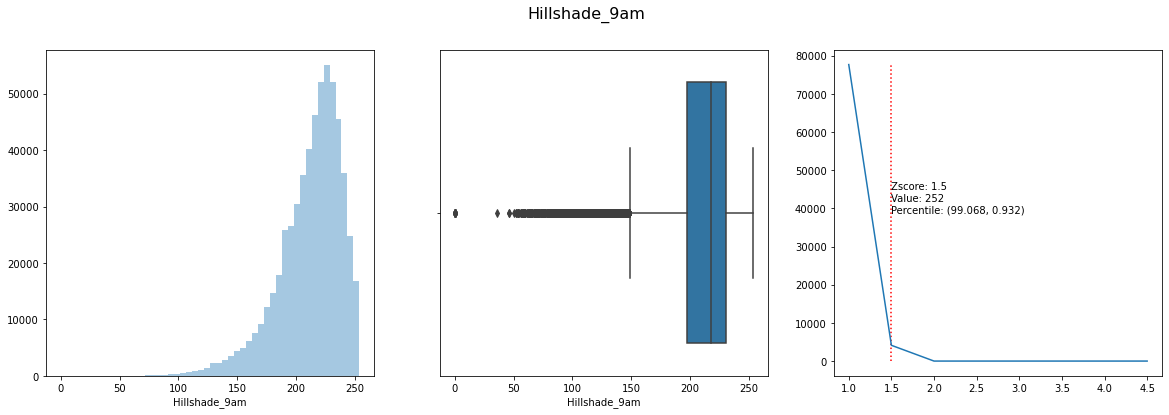

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


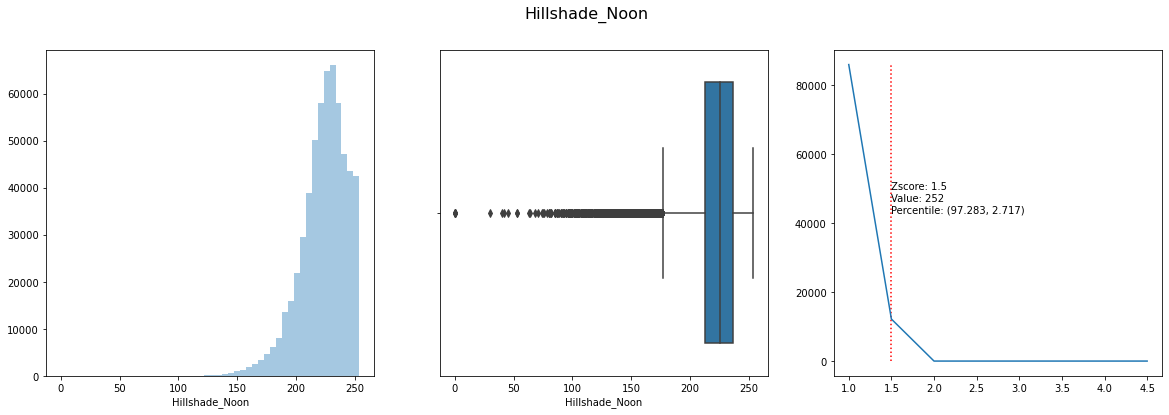

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


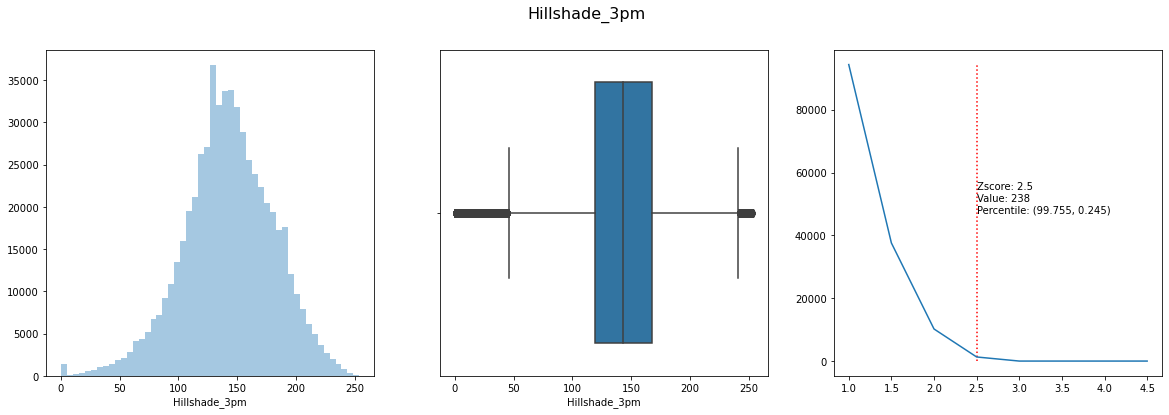

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


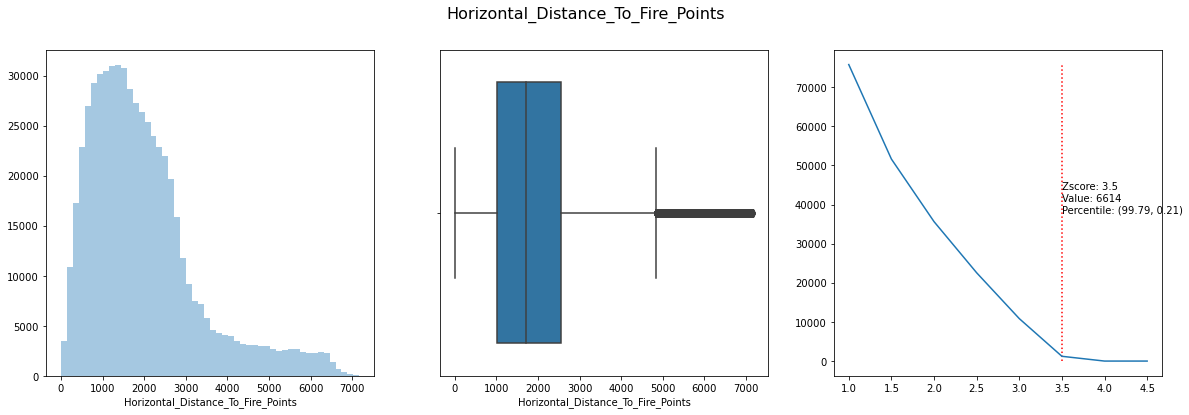

In [14]:
for col in numeric:
    outlier_inspect(tree, col)

In [15]:
def detect_outliers(df, col_name):
    """
    This function detects outliers based on 3 time IQR and returns the number of
    lower and upper limit and number of outliers respectively
    """
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile + (3 * IQR)
    lower_limit = first_quartile - (3 * IQR)
    outlier_count = 0
    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

In [16]:
for col in numeric:
    if detect_outliers(tree, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(tree, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


In [17]:
tree1 = tree[(tree["Slope"] > detect_outliers(tree, "Slope")[0]) &
            (tree["Slope"] < detect_outliers(tree, "Slope")[1])]

In [18]:
tree1.shape

(580640, 55)

In [19]:
tree1 = tree1[(tree1["Horizontal_Distance_To_Fire_Points"] > detect_outliers(tree1, "Horizontal_Distance_To_Fire_Points")[0]) &
            (tree1["Horizontal_Distance_To_Fire_Points"] < detect_outliers(tree1, "Horizontal_Distance_To_Fire_Points")[1])]

In [20]:
tree1.shape

(580630, 55)

In [21]:
tree1 = tree1[(tree1["Horizontal_Distance_To_Hydrology"] > detect_outliers(tree1, "Horizontal_Distance_To_Hydrology")[0]) &
            (tree1["Horizontal_Distance_To_Hydrology"] < detect_outliers(tree1, "Horizontal_Distance_To_Hydrology")[1])]

In [22]:
tree1 = tree1[(tree1["Vertical_Distance_To_Hydrology"] > detect_outliers(tree1, "Vertical_Distance_To_Hydrology")[0]) &
            (tree1["Vertical_Distance_To_Hydrology"] < detect_outliers(tree1, "Vertical_Distance_To_Hydrology")[1])]

In [23]:
tree1.shape

(574967, 55)

In [24]:
len(tree) - len(tree1)

6045

In [25]:
tree1 = tree1.reset_index(drop = True)

In [26]:
tree1.shape

(574967, 55)

In [27]:
for i in range(1, 8):
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)

the shape of the value of 1 (210004, 55)
the shape of the value of 2 (280193, 55)
the shape of the value of 3 (35546, 55)
the shape of the value of 4 (2741, 55)
the shape of the value of 5 (9453, 55)
the shape of the value of 6 (17345, 55)
the shape of the value of 7 (19685, 55)


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

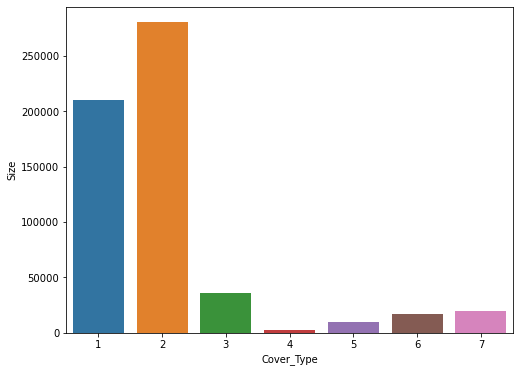

In [28]:
class_tree = tree1.groupby("Cover_Type").size()
class_label = pd.DataFrame(class_tree, columns=["Size"])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index, y="Size", data=class_label)

In [29]:
# As we can see from the graph above, the dataset is highly imbalanced.

In [30]:
for i, number in enumerate(class_tree):
    percent = (number / class_tree.sum())
    print("Cover_Type", class_tree.index[i])
    print("%.2f"% percent)

Cover_Type 1
0.37
Cover_Type 2
0.49
Cover_Type 3
0.06
Cover_Type 4
0.00
Cover_Type 5
0.02
Cover_Type 6
0.03
Cover_Type 7
0.03


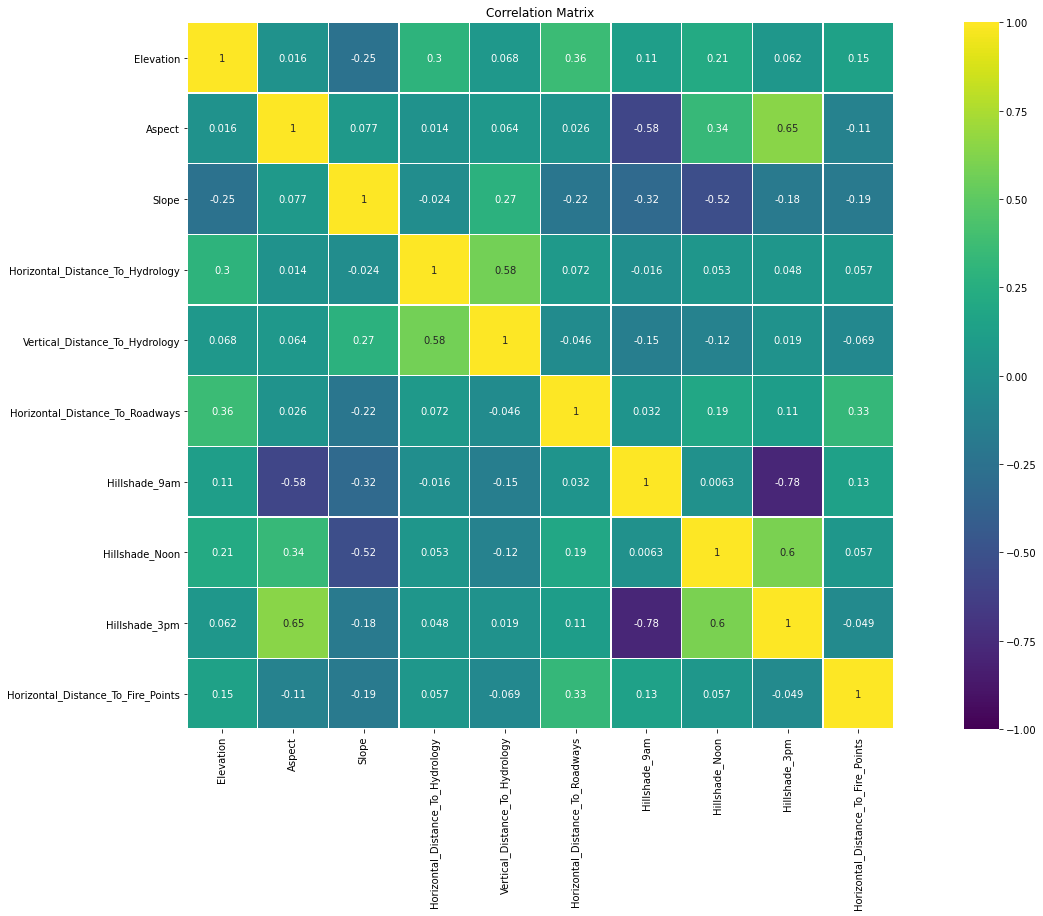

In [31]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidth=.5, vmin=-1, vmax=1, cmap="viridis")
plt.title("Correlation Matrix")

plt.show()

In [32]:
tree1.to_csv("covtype_EDA.csv", index=False)

In [34]:
# Creation of the connection and importing dataframe into database.

with sqlite3.connect("tree_database.db") as cnnct:
    tree1.to_sql("covtype2", cnnct, if_exists="replace")

In [35]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, (Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype2;"""

In [36]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24, 
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype2;"""

In [37]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [38]:
df2.to_csv("covtype2.csv", index=False)

In [40]:
df = pd.read_csv("covtype2.csv")

In [41]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,232,6279,1,0,0,...,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,235,6225,1,0,0,...,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,238,6121,1,0,0,...,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,238,6211,1,0,0,...,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,234,6172,1,0,0,...,0,0,0,0,0,0,5,23410,272,1297


In [42]:
df.shape

(574967, 46)

In [43]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
xgb_classifier = XGBClassifier()

In [46]:
xgb_classifier.fit(X_train, y_train)

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_predicted = xgb_classifier.predict(X_test)

In [48]:
xgb_accuracy = accuracy_score(y_test, y_predicted)

In [49]:
xgb_accuracy

0.8714599602298091

In [53]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85     62911
           2       0.87      0.90      0.88     84187
           3       0.90      0.91      0.91     10576
           4       0.89      0.87      0.88       838
           5       0.88      0.60      0.71      2877
           6       0.86      0.82      0.84      5224
           7       0.95      0.91      0.93      5878

    accuracy                           0.87    172491
   macro avg       0.89      0.84      0.86    172491
weighted avg       0.87      0.87      0.87    172491



In [57]:
#XGBoost performed very well!

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


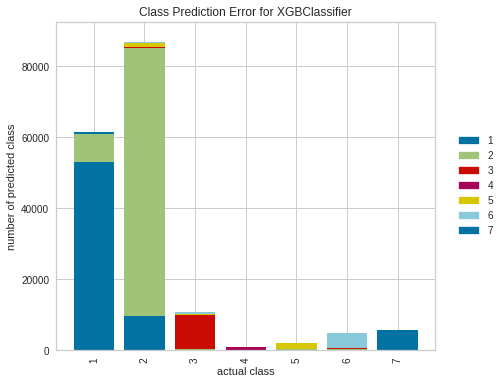

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [58]:
visualizer = ClassPredictionError(xgb_classifier)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


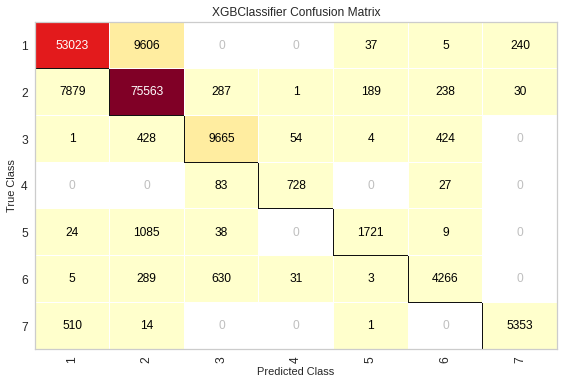

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
cm = ConfusionMatrix(xgb_classifier)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

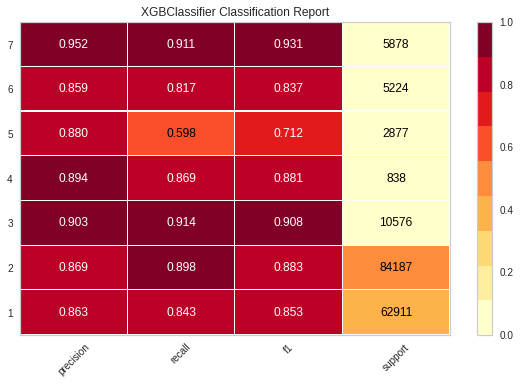

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [61]:
visualizer = ClassificationReport(xgb_classifier, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [63]:
# Let's try Decision Tree now

In [64]:
modelTree = DecisionTreeClassifier()

In [65]:
modelTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
pred = modelTree.predict(X_test)

In [67]:
tree_accuracy = accuracy_score(pred, y_test)

In [68]:
tree_accuracy

0.9352314033775675

In [69]:
# It performed even better than XGBoost.

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


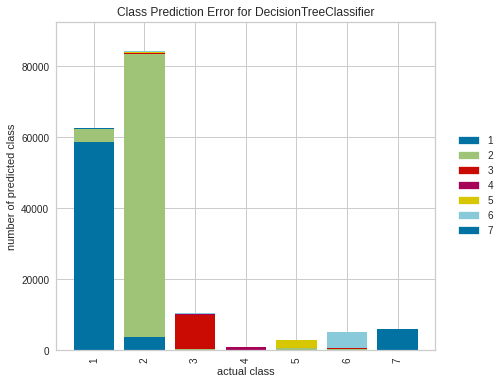

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [70]:
visualizer = ClassPredictionError(modelTree)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


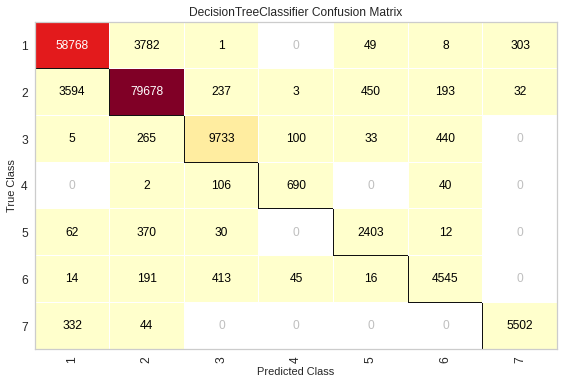

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [71]:
cm = ConfusionMatrix(modelTree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


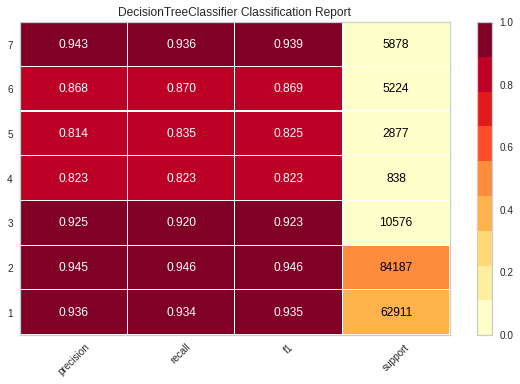

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [73]:
visualizer = ClassificationReport(modelTree, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [74]:
# Let's try KNN now.

In [75]:
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

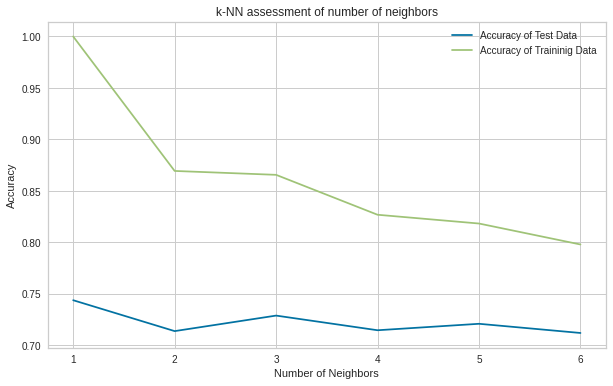

In [76]:
plt.figure(figsize=(10, 6))
plt.title("k-NN assessment of number of neighbors")
plt.plot(neighbors, test_accuracy, label="Accuracy of Test Data")
plt.plot(neighbors, train_accuracy, label="Accuracy of Traininig Data")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [77]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
knn_accuracy = knn5.score(X_test, y_test)

In [80]:
knn_accuracy

0.7210115310364019

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


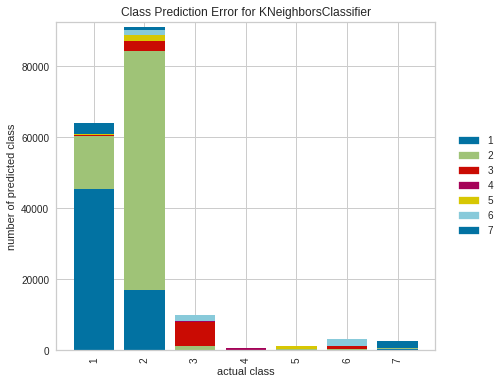

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [81]:
visualizer = ClassPredictionError(knn5)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [82]:
# KNN performed badly without scaling. We should perhaps try to scale the data and try it again.

In [83]:
# Let's try random forest now. Scaling is not necessary for tree based models.

In [84]:
# I want to tune our hyperparameters with GridSearch First. Might take a long time.

In [85]:
rf = RandomForestClassifier()

In [86]:
rf_params = {"n_estimators": [50, 100, 300, 400, 500],
            "max_depth": [1, 3, 5, 7, 9],
            "max_features": [2, 4, 6, 8],
            "min_samples_split": [1, 2, 3, 4],
            }

In [120]:
# rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
# Okay this took like 10 hours so I'll comment it out so that I won't accidentally run it again.

In [91]:
rf_cv_model.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_split': 3,
 'n_estimators': 500}

In [92]:
rf_tuned = RandomForestClassifier(max_depth=9,
                                 max_features=8,
                                 min_samples_split=3,
                                 n_estimators=500).fit(X_train, y_train)

In [93]:
y_pred = rf_tuned.predict(X_test)

In [96]:
confusion_matrix(y_test, y_pred)

array([[46783, 15901,     3,     0,     0,     0,   224],
       [13812, 69741,   471,     1,     0,   157,     5],
       [    0,  1298,  9155,    17,     0,   106,     0],
       [    0,     0,   532,   304,     0,     2,     0],
       [   10,  2819,    48,     0,     0,     0,     0],
       [    0,  1476,  2577,    13,     0,  1158,     0],
       [ 2847,    16,     0,     0,     0,     0,  3015]])

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74     62911
           2       0.76      0.83      0.80     84187
           3       0.72      0.87      0.78     10576
           4       0.91      0.36      0.52       838
           5       0.00      0.00      0.00      2877
           6       0.81      0.22      0.35      5224
           7       0.93      0.51      0.66      5878

    accuracy                           0.75    172491
   macro avg       0.70      0.51      0.55    172491
weighted avg       0.75      0.75      0.74    172491



/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


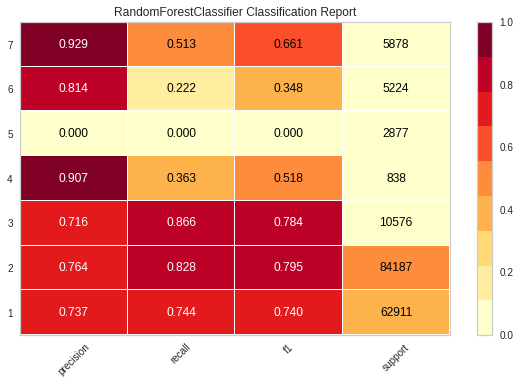

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [98]:
visualizer = ClassificationReport(rf_tuned, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [99]:
#Tuned model didn't perform well. Let's try it with the default hyperparameters.

In [100]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
rfc_pred = rfc.predict(X_test)

In [103]:
rfc_accuracy = rfc.score(X_test, y_test)

In [104]:
rfc_accuracy

0.9616907548799648

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


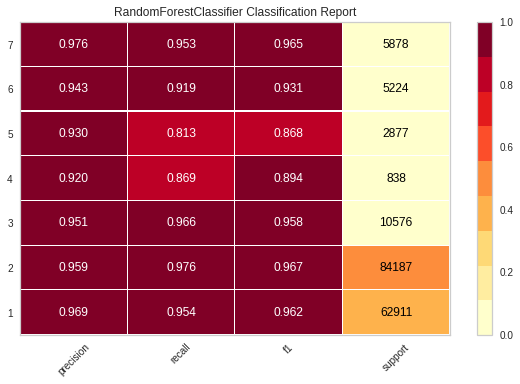

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [105]:
visualizer = ClassificationReport(rfc, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [106]:
# Let's compare our models now

Text(0.5, 1.0, 'Accuracy Score of Different Models')

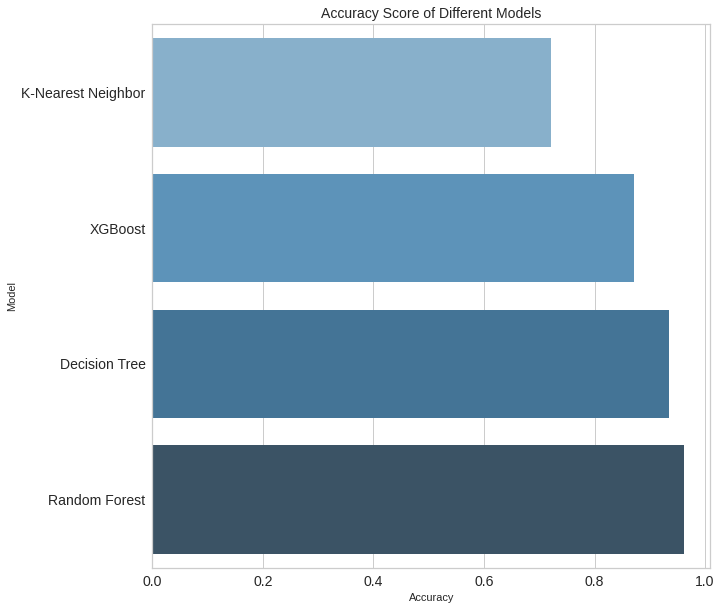

In [109]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                       "Accuracy": [knn_accuracy, rfc_accuracy, xgb_accuracy, tree_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Accuracy Score of Different Models", size=14)

In [110]:
# As we can see from the graph above, Random Forest with the default hyperparameters performed
# the best.

In [111]:
# Let's try SVM now

In [121]:
modelSVM = LinearSVC(max_iter = 500000)

In [122]:
sc = StandardScaler()

In [123]:
scaled_X_train = sc.fit_transform(X_train)

In [124]:
scaled_X_test = sc.transform(X_test)

In [125]:
modelSVM.fit(scaled_X_train, y_train)

LinearSVC(max_iter=500000)

In [126]:
pred = modelSVM.predict(scaled_X_test)

In [127]:
SVM_accuracy = accuracy_score(pred, y_test)

In [128]:
SVM_accuracy

0.7113472586975552

In [129]:
# let's try knn with scaled data now.

In [130]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

In [132]:
knn_scaled.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [133]:
knn_accuracy = knn_scaled.score(X_test, y_test)

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


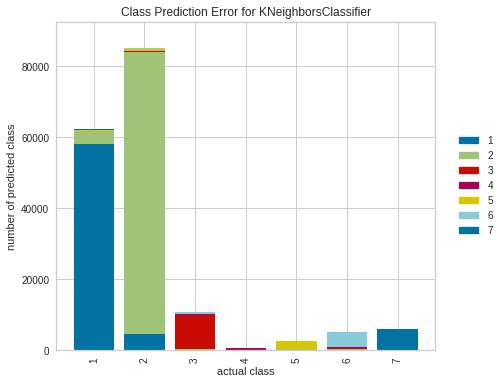

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [134]:
visualizer = ClassPredictionError(knn_scaled)

visualizer.fit(scaled_X_train, y_train)
visualizer.score(scaled_X_test, y_test)
visualizer.show()

In [135]:
knn_accuracy

0.11806413088219095